In [51]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
from matplotlib.ticker import MaxNLocator
import numpy as np

print('Anaconda version: 1.6.14')
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

Anaconda version: 1.6.14
pandas version: 1.1.5
numpy version: 1.19.2
matplotlib version: 3.3.4


In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [4]:
# abre a planilha de dados
arquivo_csv = 'dados_3m.csv'

original = pd.read_csv(arquivo_csv, ';')

In [5]:
df = original.copy()

In [6]:
# linhas e colunas
df.shape

(1009, 34)

In [7]:
# apenas palmeiras com altura entre 3 e 4 m
df = df[df['Altura Palmeira (m)'] == 3]

In [8]:
# elimina colunas vazias
df = df.dropna(how='all', axis='columns')

In [9]:
# elimina colunas nao nomeadas
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [10]:
df.shape

(193, 13)

In [11]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional
0,29/11/2019,1.0,3.0,Copa,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Classificada
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3,N,Umbrófila
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,"4,5",N,Umbrófila
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,"5,4",S,Secundária Inicial
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,"10,8",S,Secundária Inicial


In [12]:
# tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira               float64
Altura Palmeira (m)    float64
Área                    object
Quadrante              float64
Número                  object
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Nativa                  object
Estágio sucessional     object
dtype: object


In [13]:
# ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype(str)
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str,)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

# troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')

In [14]:
# tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                   object
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Nativa                   object
Estágio sucessional      object
dtype: object


In [15]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional
0,29/11/2019,1.0,3.0,Copa,1.0,NaN,nan,nan,nan,NaN,NaN,nan,Não Classificada
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3.0,N,Umbrófila
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,4.5,N,Umbrófila
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,5.4,S,Secundária Inicial
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,10.8,S,Secundária Inicial


In [16]:
# numero de linhas e colunas
df.shape

(193, 13)

In [17]:
# ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [18]:
# ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [19]:
# remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [20]:
# contar registros em cada grupo em estudo
df['Área'].value_counts()

Entorno    135
Copa        58
Name: Área, dtype: int64

In [21]:
# dataframe com quadrantes sem plantas (df_with_nan)
df_with_nan= df.copy()
#df_with_nan['Número'] =  df_with_nan['Número'].fillna(0)
df_with_nan['Área'].value_counts()

Entorno    135
Copa        58
Name: Área, dtype: int64

In [22]:
# quantidade de individuos nas parcelas da copa
copa_with_nan = df_with_nan[df_with_nan['Área'] == 'Copa']
abundancia_copa = copa_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa

Palmeira  Quadrante
1         1.0          0
          2.0          8
          3.0          0
          4.0          1
2         1.0          2
          2.0          1
          3.0          3
          4.0          3
3         1.0          2
          2.0          0
          3.0          5
          4.0          3
4         1.0          2
          2.0          3
          3.0          5
          4.0          4
5         1.0          5
          2.0          2
          3.0          2
          4.0          4
Name: Número, dtype: int64

In [23]:
# percentual de individuos sob as copas
total_parcelas_copa = abundancia_copa.count()
copa_0_2 = (abundancia_copa[abundancia_copa < 3 ].count() / total_parcelas_copa) * 100
copa_3_5 = (abundancia_copa[abundancia_copa[(abundancia_copa >= 3) & (abundancia_copa <6)]].count()/ total_parcelas_copa) * 100
copa_6_8 = (abundancia_copa[abundancia_copa[(abundancia_copa > 6) ]].count() / total_parcelas_copa) * 100
dados_copa = [copa_0_2,copa_3_5,copa_6_8]
dados_copa

[50.0, 45.0, 5.0]

Text(0.5, 0, 'Quantidade de regenerantes por parcela sob as copas')

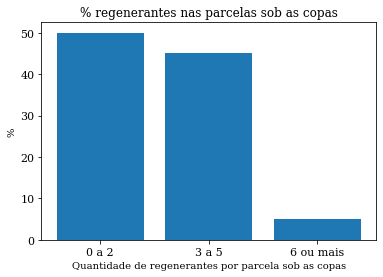

In [24]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_copa


ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela sob as copas")


In [25]:
# quantidade de individuos nas parcelas no entorno
entorno_with_nan = df_with_nan[df_with_nan['Área'] == 'Entorno']
abundancia_entorno = entorno_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_entorno

Palmeira  Quadrante
1         1.0           3
          2.0          10
          3.0           6
          4.0           3
2         1.0           3
          2.0           4
          3.0           4
          4.0           4
3         1.0           9
          2.0           3
          3.0           4
          4.0           6
4         1.0           7
          2.0           8
          3.0           9
          4.0          13
5         1.0           6
          2.0          13
          3.0          14
          4.0           6
Name: Número, dtype: int64

In [26]:
# percentual de indiviudos nas parcelas do entorno
total_parcelas_entorno = abundancia_entorno.count()
entorno_0_2 = (abundancia_entorno[abundancia_entorno < 3 ].count() / total_parcelas_entorno) * 100
entorno_3_5 = (abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 3) & (abundancia_entorno <6)]].count() / total_parcelas_entorno) * 100
entorno_6_14 =(abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 6) ]].count() / total_parcelas_entorno) * 100
dados_entorno = [entorno_0_2,entorno_3_5,entorno_6_14]
dados_entorno

[0.0, 40.0, 60.0]

Text(0.5, 0, 'Quantidade de regenerantes por parcela no entorno')

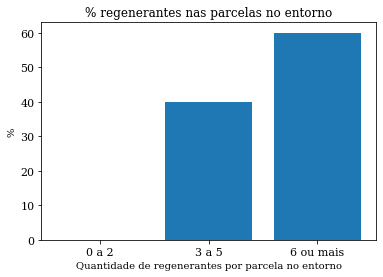

In [27]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_entorno

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela no entorno")


In [28]:
# dataframe sem quadrantes e numeros nulos (df_without_nan)
df_without_nan = df.copy()
df_without_nan.dropna(subset=[ 'Número'], inplace=True)
df_without_nan['Área'].value_counts()

Entorno    135
Copa        55
Name: Área, dtype: int64

In [29]:
# contar registros em cada coluna - área da copa
df_without_nan[df_without_nan['Área'] == 'Copa'].count()

Data                   55
Palmeira               55
Altura Palmeira (m)    55
Área                   55
Quadrante              55
Número                 55
Família                55
Gênero                 55
Espécie                55
Altura (cm)            55
Dap (mm)               55
Nativa                 55
Estágio sucessional    55
dtype: int64

In [30]:
# contar registros em cada coluna - área do entorno
df_without_nan[df_without_nan['Área'] == 'Entorno'].count()

Data                   135
Palmeira               135
Altura Palmeira (m)    135
Área                   135
Quadrante              135
Número                 135
Família                135
Gênero                 135
Espécie                135
Altura (cm)            135
Dap (mm)               135
Nativa                 135
Estágio sucessional    135
dtype: int64

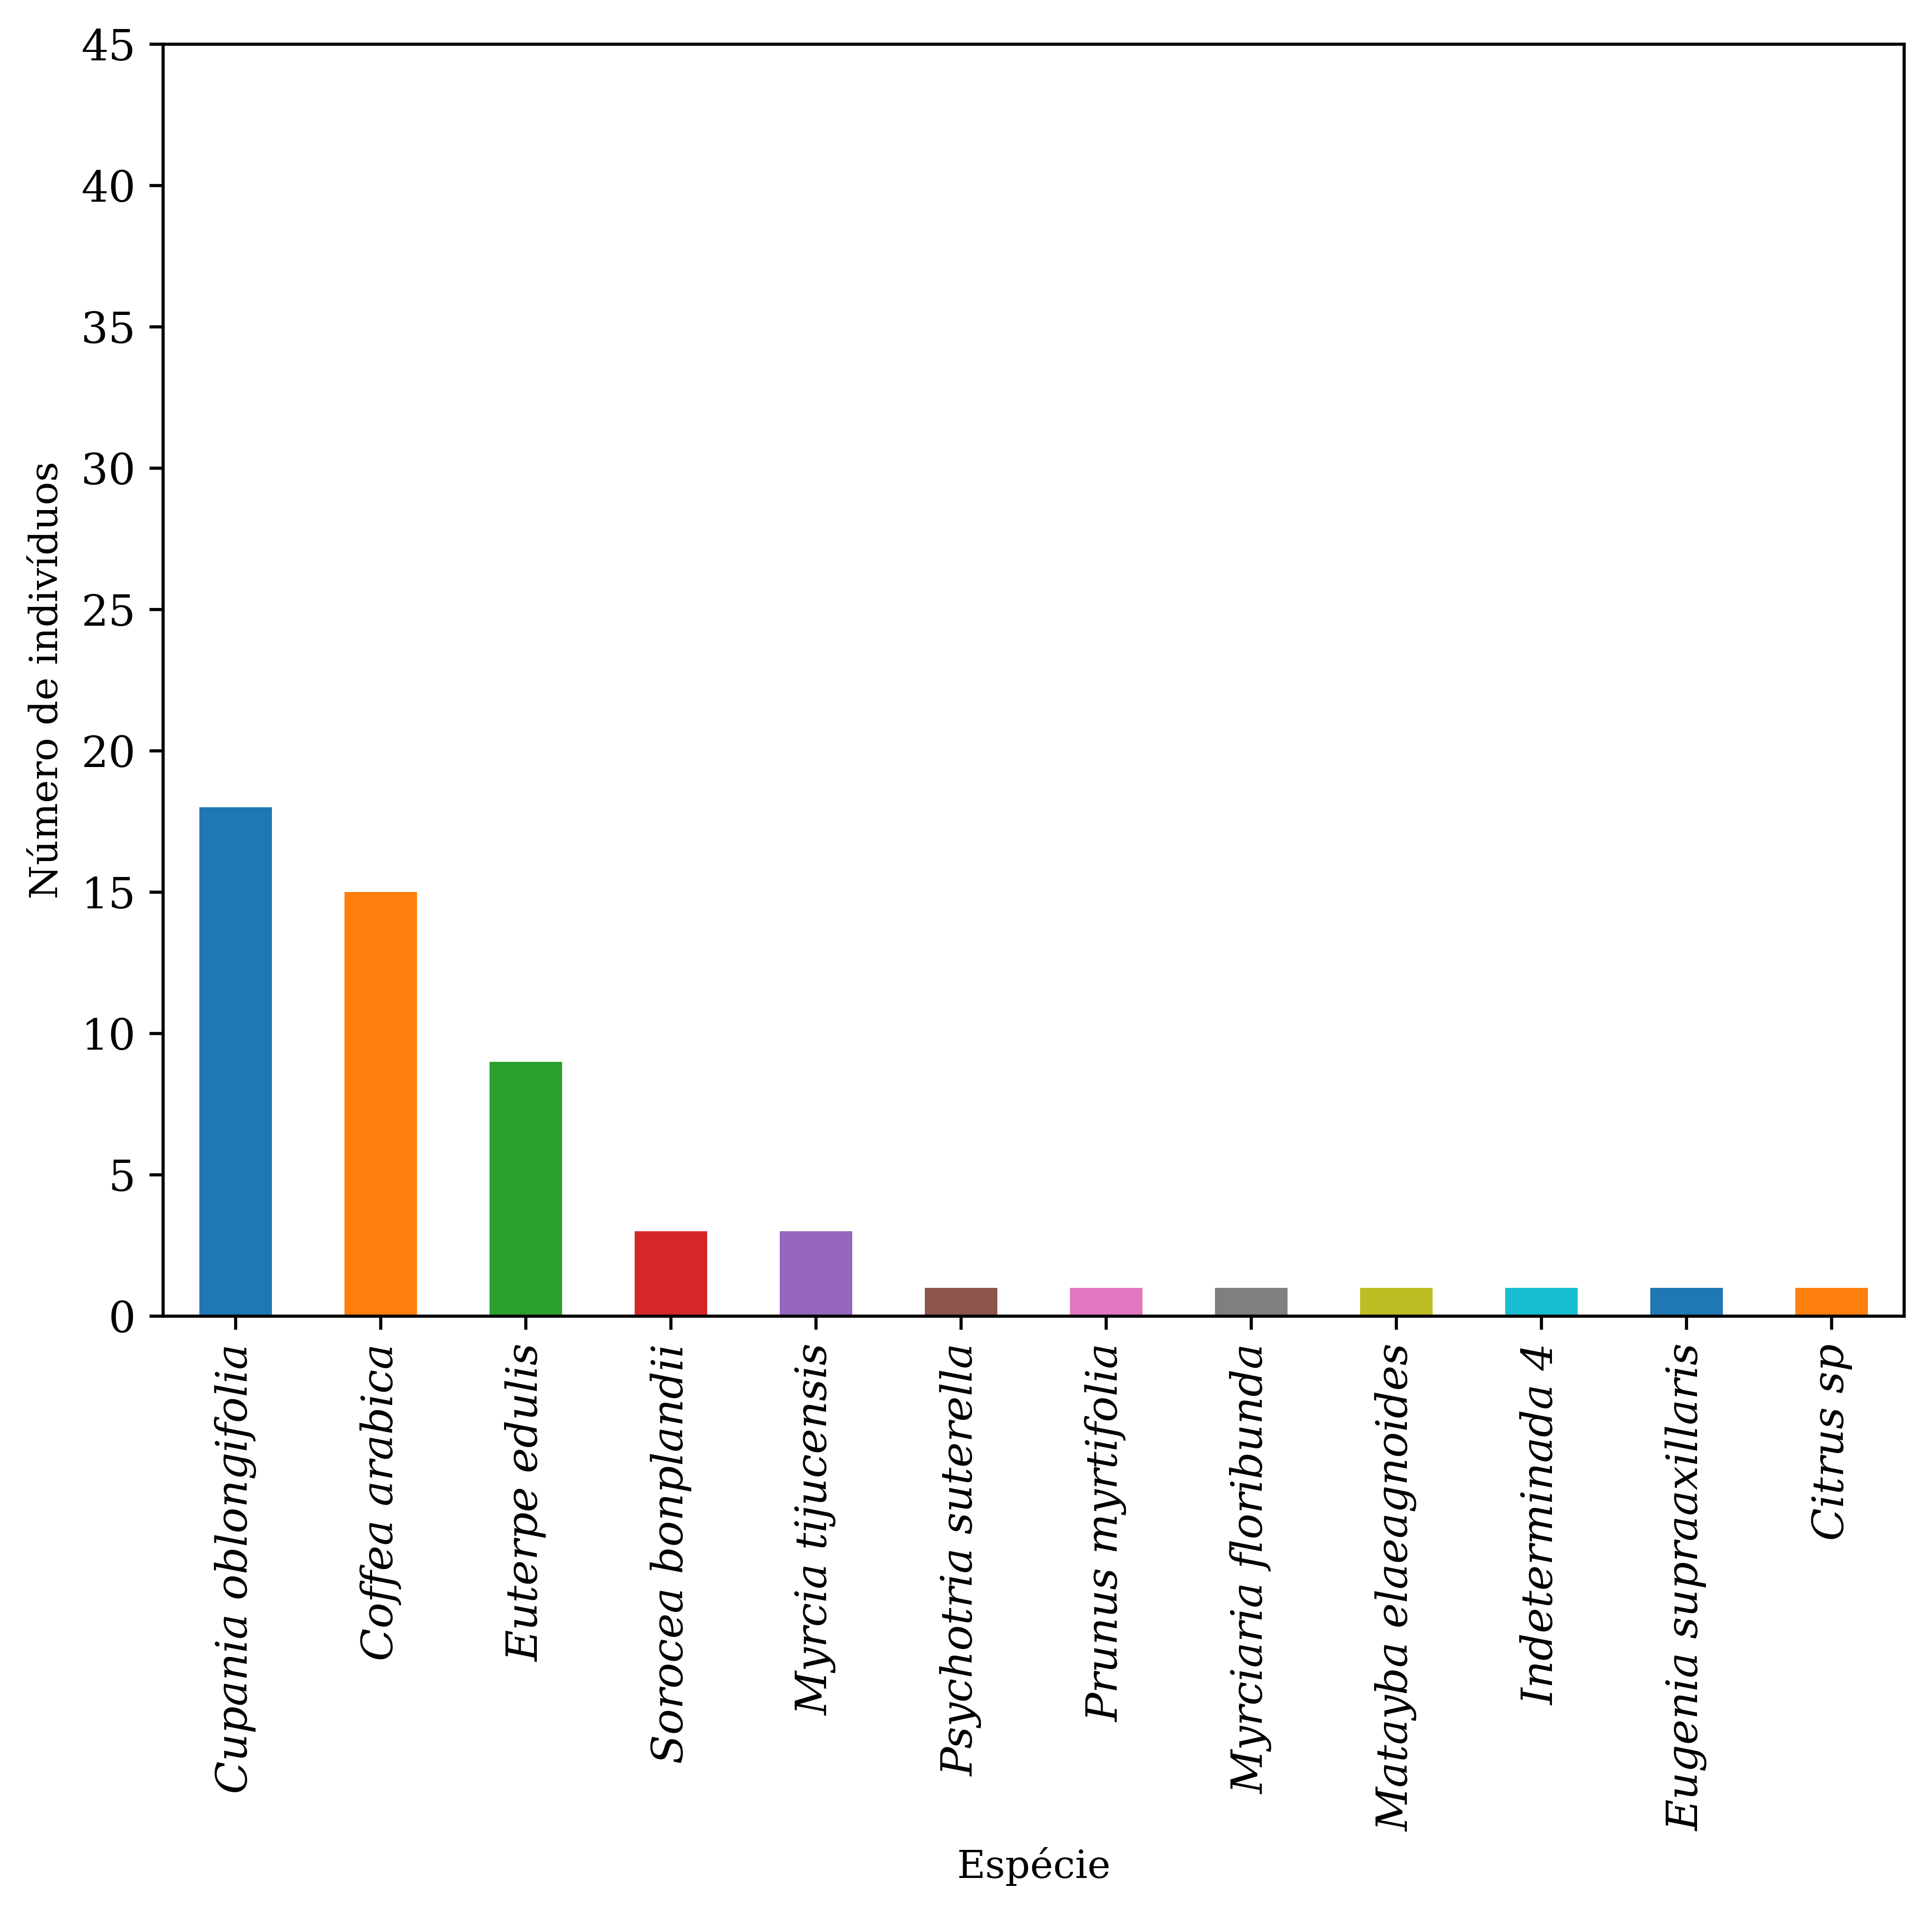

In [49]:
# Número de indivíduos por espécie sob as copas de L. chinensis de 3 m.
plot_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)

ax = plt.figure(figsize=(8, 6), dpi=600).gca()
ax = plot_copa.plot.bar(color=colors)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.yticks(np.arange(0, 50, 5))
plt.xticks(fontstyle='italic')

#plt.title ("Copa")
plt.ylabel("Número de indivíduos")
plt.savefig('fig5-palm-3m-copa', format='png', dpi=1500, bbox_inches='tight')
plt.show()

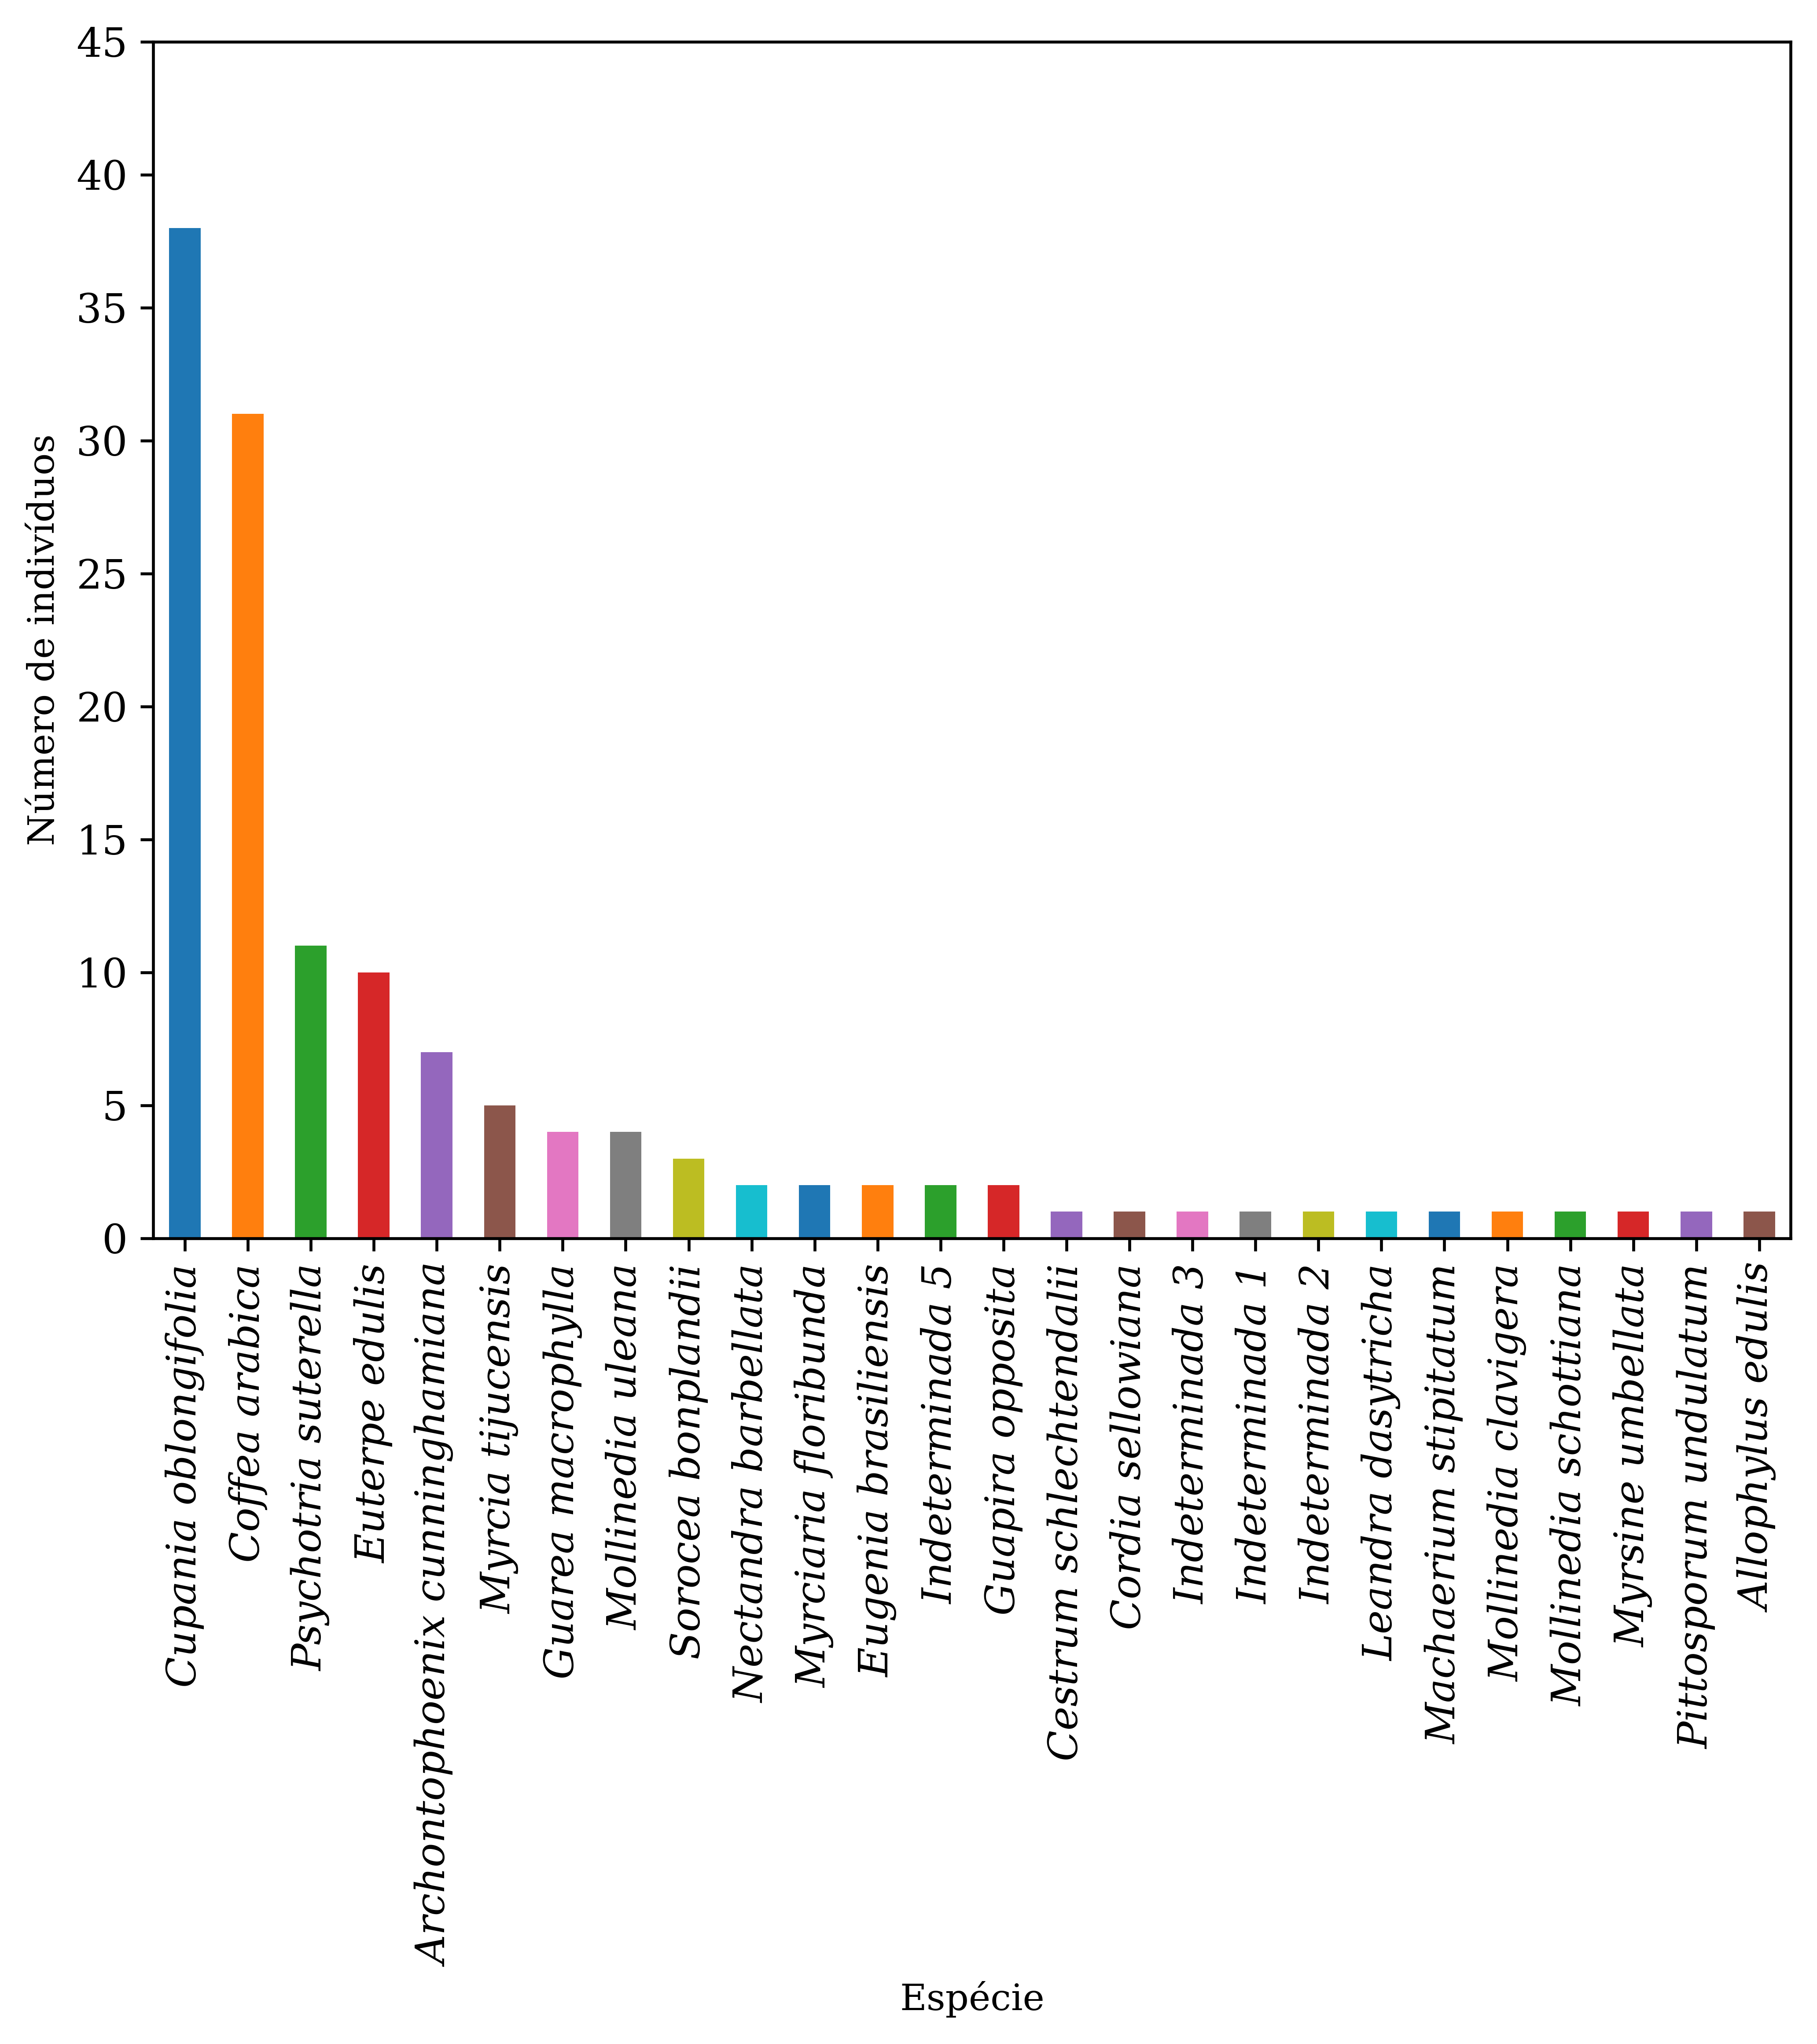

In [50]:
# Número de indivíduos por espécie no entorno de L. chinensis de 3 m.

plot_entorno = df_without_nan[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)

ax = plt.figure(figsize=(8, 6), dpi=600).gca()
ax = plot_entorno.plot.bar(color=colors)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.yticks(np.arange(0, 50, 5))
plt.xticks(fontstyle='italic')
#plt.title ("Entorno")
plt.ylabel("Número de indivíduos")

plt.savefig('fig5-palm-3m-entorno', format='png', dpi=1500, bbox_inches='tight')
plt.show()

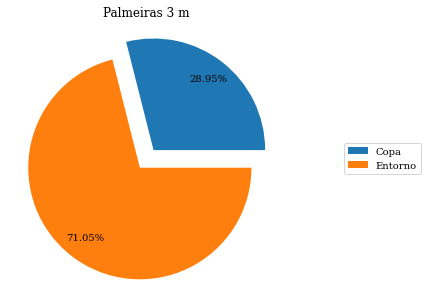

In [33]:
# percentual de indivíduos arbóreos regenerantes sob as copas e no entorno de L. chinensis de 3 m.

regenerantes_por_area = df_without_nan[~df_without_nan['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area['Número'] > 0]
regenerantes_por_area = regenerantes_por_area.dropna()

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]
plt.close()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.title ("Palmeiras 3 m")

plt.savefig('fig2-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


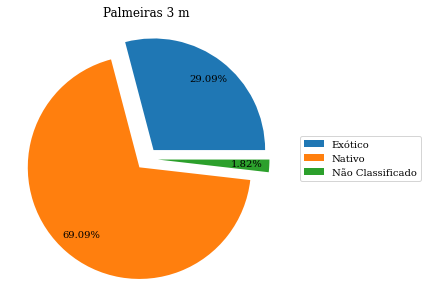

In [34]:
# Proporção de indivíduos regenerantes nativos e exóticos sob as copas de L. chinensis de 3 m
plt.close()
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem['Número'] > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, 
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.title ("Palmeiras 3 m")

plt.savefig('fig8-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
regenerantes_por_origem

,Nativa,Número
0,N,16
1,S,38
2,indeterminado,1


In [36]:
a = df_without_nan[df_without_nan['Área'] == 'Entorno']
b = a[a['Nativa'] == 'S']
c = b.groupby('Espécie', as_index=False)['Número'].count() 
c

,Espécie,Número
0,Allophylus edulis,1
1,Cestrum schlechtendalii,1
2,Cordia sellowiana,1
3,Cupania oblongifolia,38
4,Eugenia brasiliensis,2
5,Euterpe edulis,10
6,Guapira opposita,2
7,Guarea macrophylla,4
8,Leandra dasytricha,1
9,Machaerium stipitatum,1


/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


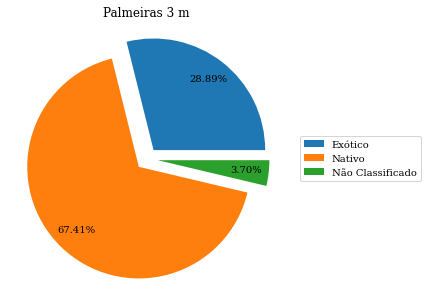

In [37]:
# Proporção de indivíduos regenerantes nativos e exóticos no entorno de de L. chinensis de 3 m
plt.close()
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem['Número']  > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, 
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.title ("Palmeiras 3 m")

plt.savefig('fig9-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
regenerantes_por_origem

,Nativa,Número
0,N,39
1,S,91
2,indeterminado,5


In [39]:
a = df_without_nan[df_without_nan['Área'] == 'Entorno']
b = a[a['Nativa'] == 'S']
c = b.groupby('Espécie', as_index=False)['Número'].count() 
c

,Espécie,Número
0,Allophylus edulis,1
1,Cestrum schlechtendalii,1
2,Cordia sellowiana,1
3,Cupania oblongifolia,38
4,Eugenia brasiliensis,2
5,Euterpe edulis,10
6,Guapira opposita,2
7,Guarea macrophylla,4
8,Leandra dasytricha,1
9,Machaerium stipitatum,1


/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


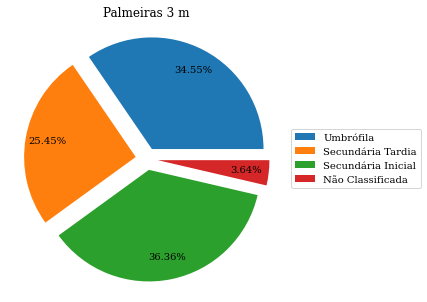

In [40]:
#  Proporção de indivíduos regenerantes sob as copas de L. chinensis de 3 m por classificação sucessional.
plt.close()
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio['Número'] > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()
regenerantes_por_estagio = regenerantes_por_estagio.sort_values('Estágio sucessional', ascending=0)

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()
labels
explode = [0.1, 0.1, 0.1, 0.1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")


plt.title ("Palmeiras 3 m")

plt.savefig('fig10-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
regenerantes_por_estagio 

,Estágio sucessional,Número
3,Umbrófila,19
2,Secundária Tardia,14
1,Secundária Inicial,20
0,Não Classificada,2


In [42]:
labels

['Umbrófila', 'Secundária Tardia', 'Secundária Inicial', 'Não Classificada']

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


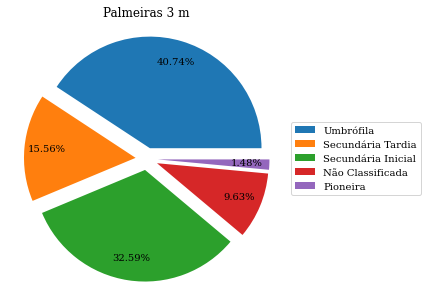

In [43]:
#  Proporção de indivíduos regenerantes no entorno de L. chinensis de 3 m por classificação sucessional.
plt.close()
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio['Número'] > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()
regenerantes_por_estagio = regenerantes_por_estagio.sort_values('Estágio sucessional', ascending=0)

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()
label_aux = labels[4]
labels[4] = labels[3]
labels[3] = label_aux

sizes =  regenerantes_por_estagio['Número'].tolist()
sizes_aux = sizes[4]
sizes[4] = sizes[3]
sizes[3] = sizes_aux

explode = [0.1, 0.1, 0.1, 0.1, 0.1]


fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, 
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")


plt.title ("Palmeiras 3 m")

plt.savefig('fig11-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
regenerantes_por_estagio

,Estágio sucessional,Número
4,Umbrófila,55
3,Secundária Tardia,21
2,Secundária Inicial,44
1,Pioneira,2
0,Não Classificada,13


In [45]:
# distribuição das espécies  regenerantes

# especies copa
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

# especies entorno
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

# especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]

# especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [46]:
# apenas copa
only_copa

58          Prunus myrtifolia
94       Matayba elaeagnoides
103                 Citrus sp
148    Eugenia supraaxillaris
152           Indeterminada 4
Name: Espécie, dtype: object

In [47]:
# apenas entorno
only_entorno

12              Mollinedia schottiana
51                   Guapira opposita
52                 Guarea macrophylla
68                  Mollinedia uleana
69              Pittosporum undulatum
70               Mollinedia clavigera
75              Machaerium stipitatum
77                    Indeterminada 1
78            Cestrum schlechtendalii
81               Eugenia brasiliensis
109                 Allophylus edulis
110                Leandra dasytricha
111    Archontophoenix cunninghamiana
120                 Myrsine umbellata
122              Nectandra barbellata
125                 Cordia sellowiana
129                   Indeterminada 5
174                   Indeterminada 3
182                   Indeterminada 2
Name: Espécie, dtype: object

In [48]:
# especies em comum
comum_copa_entorno

1            Coffea arabica
3      Cupania oblongifolia
8      Myrciaria floribunda
36           Euterpe edulis
91        Myrcia tijucensis
141      Sorocea bonplandii
142    Psychotria suterella
Name: Espécie, dtype: object

In [49]:
# merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,5
0,Entorno,19
0,Ambos,7


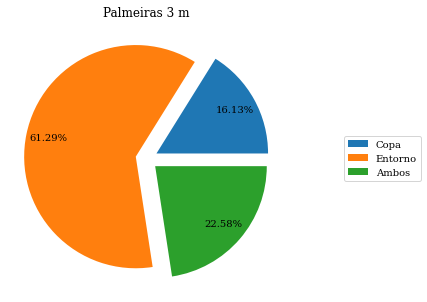

In [50]:
# Proporção de espécies no entorno e sob as copas de L. chinensis de 3 m.
plt.close()
labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, 
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.title ("Palmeiras 3 m")

plt.savefig('fig4-palm-3m', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
labels

['Copa', 'Entorno', 'Ambos']

In [52]:
sizes

[5, 19, 7]

In [53]:
# proporcao de individuos regenerantes na copa e no entorno de L. chinensis de 3 m

# copa
copa_total = df_without_nan[df_without_nan['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

# entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)
resultado_merge


,Área,Quantidade
0,Copa,55
0,Entorno,135
